# Программирование на языке Python
## Семинар 12. Pandas

Задача - разработать модель, которая бы предсказывали рейтинг ресторана для тех локаций, по которым рейтинг пока не составлен.

In [10]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('zomato.csv', encoding='Windows-1251')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
# Заметки
#1 Cuisines: пропущенные значения

In [ ]:
# Действия
#1 target хорошо бы взвесить на Votes

In [11]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591  
2   Very Good    270  
3   Excellent    365  
4   Excellent    229

#### 1. Исследуем таргет

Таргет - 'Aggregate rating'.

In [6]:
df['Aggregate rating'].describe().round(2)

count    9551.00
mean        2.67
std         1.52
min         0.00
25%         2.50
50%         3.20
75%         3.70
max         4.90
Name: Aggregate rating, dtype: float64

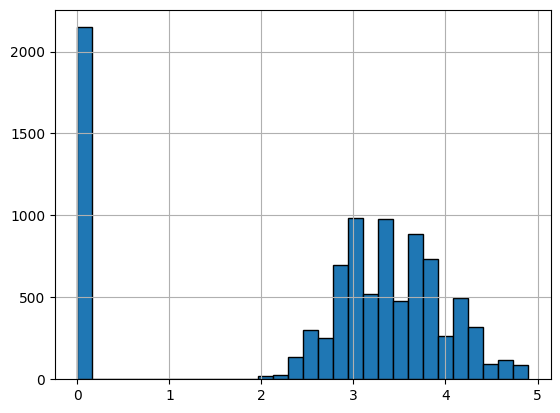

In [8]:
df['Aggregate rating'].hist(bins=30, edgecolor='black');

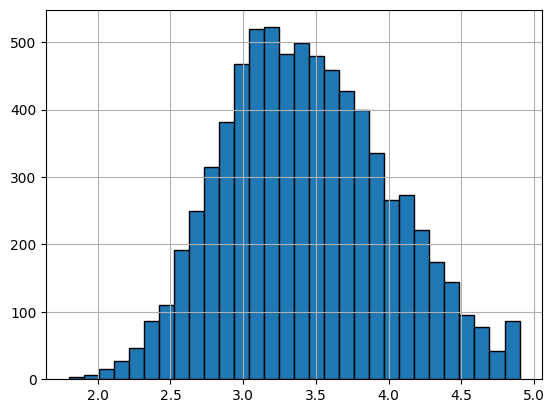

In [14]:
df.loc[df['Aggregate rating'] != 0, 'Aggregate rating'].hist(bins=30, edgecolor='black');

In [16]:
df.loc[df['Aggregate rating'] == 0, :]

Restaurant ID         Restaurant Name  Country Code            City  \
30          6600060          Sandubas Cafн©            30       Brasн_lia   
58          7305048   Quiosque Chopp Brahma            30  Rio de Janeiro   
69          6710645        Cantinho da Gula            30      SнЈo Paulo   
77          6701419           Divino FogнЈo            30      SнЈo Paulo   
78          6703956             Super Grill            30      SнЈo Paulo   
...             ...                     ...           ...             ...   
9109       18277023           Bread & Pasta             1           Noida   
9110       18313203           Chillies Cafe             1           Noida   
9111       18254559                Platters             1           Noida   
9112       18255132               The Grand             1           Noida   
9351       18273002  Damascena Coffee House           215      Birmingham   

                                                Address  \
30    Edifн_cio Josн© Severo, SCS 6, Bloco A, Loja 9...   
58    Madureira Shopping - Loja 289/290, Piso 2, Est...   
69    Rua Pedroso Alvarenga, 522, Itaim Bibi, SнЈo P...   
77    Shopping MetrнЗ Santa Cruz - Piso L2, Rua Domi...   
78    Shopping Morumbi - Piso Lazer, Avenida Roque P...   
...                                                 ...   
9109  Shop 15, Near HDFC Bank, Tulip Mall, Sector 48...   
9110                 G-11, Tulip Mall, Sector 48, Noida   
9111  Shop 1, Tulip Mall, Near HDFC Bank, Sector 48,...   
9112                  G-5, Tulip Mall, Sector 48, Noida   
9351             133 Alcester Road, Moseley, Birmingham   

                                      Locality  \
30                                     Asa Sul   
58                                   Madureira   
69                                  Itaim Bibi   
77    Shopping MetrнЗ Santa Cruz, Vila Mariana   
78               Shopping Morumbi, Santo Amaro   
...                                        ...   
9109              Tulip Mall, Sector 48, Noida   
9110              Tulip Mall, Sector 48, Noida   
9111              Tulip Mall, Sector 48, Noida   
9112              Tulip Mall, Sector 48, Noida   
9351                                   Moseley   

                                       Locality Verbose  Longitude   Latitude  \
30                                   Asa Sul, Brasн_lia -47.890167 -15.797000   
58                            Madureira, Rio de Janeiro -43.341164 -22.870413   
69                               Itaim Bibi, SнЈo Paulo -46.675667 -23.581000   
77    Shopping MetrнЗ Santa Cruz, Vila Mariana, SнЈo... -46.637167 -23.599500   
78            Shopping Morumbi, Santo Amaro, SнЈo Paulo -46.698574 -23.622925   
...                                                 ...        ...        ...   
9109                Tulip Mall, Sector 48, Noida, Noida  77.367303  28.557929   
9110                Tulip Mall, Sector 48, Noida, Noida  77.367188  28.557842   
9111                Tulip Mall, Sector 48, Noida, Noida  77.367322  28.557930   
9112                Tulip Mall, Sector 48, Noida, Noida  77.367188  28.557852   
9351                                Moseley, Birmingham  -1.888555  52.446302   

                                  Cuisines  Average Cost for two  \
30                         Brazilian, Cafe                    30   
58                     Bar Food, Brazilian                    70   
69                               Brazilian                    55   
77                      Brazilian, Mineira                    65   
78                               Brazilian                    50   
...                                    ...                   ...   
9109                             Fast Food                   400   
9110                             Fast Food                   600   
9111                 North Indian, Chinese                   500   
9112                  Raw Meats, Fast Food                   250   
9351  Greek, Mediterranean, Middle Eastern        

In [17]:
df.loc[df['Aggregate rating'] == 0, :].shape[0]

2148

#### 2.1 Определяем фичи

- 'Restaurant Name' - можно взять для генерации фичей с помощью NLP-моделей (а мы пока что просто подготовим переменную к этому);
- 'Country Code' - берем, но надо перевести коды в название;
- 'Address' - отдельные слова точно пригодятся;
- 'Longitude', 'Latitude' - берем без изменений;
- 'Cuisines' - точно берем, надо будет создать дамми-переменные из категорий;
- 'Average Cost for two' - берем, но приводим все к единой валюте;
- 'Currency' - берем, но только если она дает что-то помимо названия страны;
- 'Has Table booking':'Switch to order menu' - берем, перекодируем Yes в 1 и No в 0;
- 'Price range' - точно берем.

In [18]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591  
2   Very Good    270  
3   Excellent    365  
4   Excellent    229

In [26]:
data = df[df['Rating text'] != 'Not rated'].dropna().reset_index(drop=True)

#### 2.2 Исследуем фичи
**Cuisines**

In [20]:
data['Cuisines']

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
7398                             Turkish
7399     World Cuisine, Patisserie, Cafe
7400              Italian, World Cuisine
7401                     Restaurant Cafe
7402                                Cafe
Name: Cuisines, Length: 7403, dtype: object

In [36]:
cuisines_nested = data['Cuisines'].str.split(', ').tolist()
cuisines = pd.Series([c for lst in cuisines_nested for c in lst])

cuisines_counts = cuisines.value_counts()

cuisines_vars = cuisines_counts.index[cuisines_counts.values > 50]  # оставим только эти категории

**Address**

In [45]:
import re
from string import punctuation

punctuation = f'[{re.escape(punctuation.replace("_", ""))}\d]'
punctuation_re = re.compile(punctuation)

def process_address(address):
    address = punctuation_re.sub('', address).lower().split()

    return address

In [55]:
address_nested = data['Address'].map(process_address)
address = pd.Series([c for lst in address_nested for c in lst])

address_counts = address.value_counts()

address_words = address_counts.index[
    (address_counts.values > 100) &
    (address_counts.index.str.len() >= 4)
]

In [56]:
address_words

Index(['delhi', 'road', 'sector', 'market', 'nagar', 'floor', 'near',
       'gurgaon', 'noida', 'shop', 'mall', 'opposite', 'vihar', 'ground',
       'main', 'phase', 'block', 'place', 'colony', 'complex', 'park', 'city',
       'bagh', 'garden', 'plaza', 'centre', 'metro', 'street', 'kailash',
       'hotel', 'chowk', 'greater', 'marg', 'station', 'food', 'enclave',
       'shopping', 'court', 'faridabad', 'plot', 'tower', 'extension',
       'connaught', 'bank', 'town', 'vasant', 'defence', 'safdarjung', 'east',
       'mayur', 'rajinder', 'building', 'central', 'center', 'cyber',
       'rajouri', 'community'],
      dtype='object')

In [57]:
address_counts.index

Index(['new', 'delhi', 'road', 'sector', 'market', 'nagar', 'floor', 'near',
       'gurgaon', 'noida',
       ...
       'silk', 'yenepoya', 'parin', 'kmc', 'mercara', 'trunk', 'woodside',
       'kalikamba', 'gopalkrishna', 'bademaltы±'],
      dtype='object', length=4744)

#### 2.3 Генерируем фичи
- <s>'Restaurant Name' - можно взять для генерации фичей с помощью NLP-моделей (а мы пока что просто подготовим переменную к этому);</s>
- 'Country Code' - берем, но надо перевести коды в название;
- 'Address' - отдельные слова точно пригодятся;
- 'Longitude', 'Latitude' - берем без изменений;
- 'Cuisines' - точно берем, надо будет создать дамми-переменные из категорий;
- 'Average Cost for two' - берем, но приводим все к единой валюте;
- 'Currency' - берем, но только если она дает что-то помимо названия страны;
- 'Has Table booking':'Switch to order menu' - берем, перекодируем Yes в 1 и No в 0;
- 'Price range' - точно берем.

In [59]:
country_codes = pd.read_excel('Country-Code.xlsx')
country_codes

Country Code         Country
0              1           India
1             14       Australia
2             30          Brazil
3             37          Canada
4             94       Indonesia
5            148     New Zealand
6            162     Phillipines
7            166           Qatar
8            184       Singapore
9            189    South Africa
10           191       Sri Lanka
11           208          Turkey
12           214             UAE
13           215  United Kingdom
14           216   United States

In [63]:
data_model = data.merge(
    country_codes,
    on=['Country Code'],
    how='left',
    validate='m:1'
)

In [64]:
# dummy cols
dummy_mapper = {
    'Yes': 1,
    'No': 0
}

data_model.loc[:, 'Has Table booking':'Switch to order menu'] = data_model.loc[:, 'Has Table booking':'Switch to order menu'].apply(
    lambda col: col.map(dummy_mapper)
)

In [65]:
data_model

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
7389        5915730              NamlЫ± Gurme           208         ЫБstanbul   
7390        5908749             Ceviz AЫфacЫ±           208         ЫБstanbul   
7391        5915807                     Huqqa           208         ЫБstanbul   
7392        5916112              AЃфЃфk Kahve           208         ЫБstanbul   
7393        5927402  Walter's Coffee Roastery           208         ЫБstanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
7389  KemankeЃф Karamustafa PaЃфa Mahallesi, RЫ±htЫ±...   
7390  KoЃфuyolu Mahallesi, Muhittin нмstн_ndaЫф Cadd...   
7391  Kuruн_eЃфme Mahallesi, Muallim Naci Caddesi, N...   
7392  Kuruн_eЃфme Mahallesi, Muallim Naci Caddesi, N...   
7393  CafeaЫфa Mahallesi, BademaltЫ± Sokak, No 21/B,...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
7389                                    Karakн_y   
7390                                   KoЃфuyolu   
7391                                 Kuruн_eЃфme   
7392                                 Kuruн_eЃфme   
7393                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
7389                                Karakн_y, ЫБstanbul   28.977392   
7390                               KoЃфuyolu, ЫБstanbul   29.041297   
7391                             Kuruн_eЃфme, ЫБstanbul   29.034640   
7392                             Kuruн_eЃфme, ЫБstanbul   29.036019   
7393                                    Moda, ЫБstanbul   29.026016   

       Latitude                          Cuisines  Average Cost for two  \
0     14.565443        French, Japanese, Desserts                  1100   
1     14.553708                          Japanese                  1200   
2     14.581404  Seafood, Asian, Filipino, Indian                  4000   
3     14.585318                   Japanese, Sushi                  1500   
4     14.584450                  Japanese, Korean                  1500   
...         ...                               ...                   ...   
7389  41.022793                           Turkish                    80   
7390  41.009847   World Cuisine, Patisserie, Cafe                   105   
7391  41.055817            Italian, World Cuisine                   170   
7392  41.057979                   Restaurant Cafe                   120   
7393  40.984776      